# Testing on caltech101 Dataset

**Importing the libraries and loading the dataset**

In [1]:
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os
import openai
import configparser
import torch
import clip
from torch.utils.data import Subset
import sys
sys.path.append('../')
from Classifier import Classifier
config = configparser.ConfigParser()
config.read('../config.ini')

api_key = config['openai']['api_key']
openai.api_key = api_key

# Load the dataset using ImageFolder
dataset = ImageFolder(root='./caltech101')
labels=dataset.classes

Label: Motorbikes


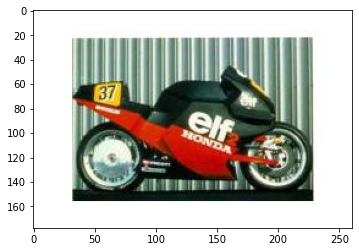

In [2]:
print(f"Label: {labels[dataset[2051][1]]}")
plt.imshow(dataset[2051][0])

**Creating a classifier and loading descriptors that were generated previously**

In [3]:
caltech=Classifier(labels)

In [4]:
caltech.load_classifier('caltech.txt')

In [5]:
caltech.descriptors['Motorbikes']

['has handlebars', 'has two wheels', 'has a motor']

**Classifying with the descriptors**

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)
tokenized_text = torch.cat([clip.tokenize(label) for label in labels]).to(device)

NameError: name 'labels' is not defined

In [7]:
from time import time
sum1=0
sum2=0
for i in range(0,len(dataset),100):
    if i==8900:
        subset=Subset(dataset,[j for j in range(i,len(dataset))])
        images=torch.stack([caltech.preprocess(image) for (image,label) in subset])
        lab=torch.Tensor([label for (image,label) in subset])
    else:
        subset=Subset(dataset,[j for j in range(i,i+100)])
        images=torch.stack([caltech.preprocess(image) for (image,label) in subset])
        lab=torch.Tensor([label for (image,label) in subset])
    print(f'Starting predictions: {i}')
    t=time()
    pred1=caltech.multi_classify(images,preprocessed=True)
    sum1+=torch.sum((pred1==lab)+0.)
    
    logits=model(images,tokenized_text)[0]
    pred2=torch.argmax(logits,dim=1)
    sum2+=torch.sum((pred2==lab)+0.)
    print(time()-t)
avg1=sum1/len(dataset)
avg2=sum2/len(dataset)

print(f'Accuracy of the custom algorithm: {avg1}')
print(f'Accuracy of the traditional zero shot prediction: {avg2}')

Starting predictions: 0
453.54760670661926
Starting predictions: 100
473.54465079307556
Starting predictions: 200
622.502293586731
Starting predictions: 300
517.8134038448334
Starting predictions: 400
682.4918320178986
Starting predictions: 500
555.9716384410858
Starting predictions: 600
684.8799538612366
Starting predictions: 700
520.1042816638947
Starting predictions: 800
688.5782594680786
Starting predictions: 900
489.63669204711914
Starting predictions: 1000
481.8537323474884
Starting predictions: 1100
684.691347360611
Starting predictions: 1200
482.2901201248169
Starting predictions: 1300
491.75995802879333
Starting predictions: 1400
672.6643261909485
Starting predictions: 1500
506.4919421672821
Starting predictions: 1600
504.8498158454895
Starting predictions: 1700
670.6015393733978
Starting predictions: 1800
552.2375638484955
Starting predictions: 1900
658.0435538291931
Starting predictions: 2000
643.400500535965
Starting predictions: 2100
512.3382127285004
Starting predictions:

In [6]:
caltech.set_image(dataset[8805][0])

This image may show: 
1) lotus: 55.18273162841797%
2) water_lilly: 44.783050537109375%
3) tick: 0.01769670657813549%
4) strawberry: 0.011423630639910698%
5) starfish: 0.005089113488793373%


'lotus'

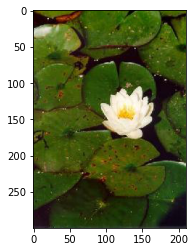

In [7]:
caltech.classify(verbose=True)

In [9]:
caltech.explain('lotus')

lotus is characterized by the following features: 
❌ has a large, round petal shape: (tensor([23.6658]), array([[24.101418, 24.696177, 22.199957]], dtype=float32))
❌ has a light pink color: (tensor([23.6658]), array([[24.101418, 24.696177, 22.199957]], dtype=float32))
❌ has a smooth texture: (tensor([23.6658]), array([[24.101418, 24.696177, 22.199957]], dtype=float32))


In [10]:
caltech.threshold

27.33047866821289